In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Importing the Dataset

In [2]:
data = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(f'shape of data : {data.shape}')
print(f'columns in data set: {data.columns}')
data.head()

shape of data : (7043, 21)
columns in data set: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As shown above, the data set contains 19 independent variables, which can be classified into 3 groups:

(1) Demographic Information

    gender: Whether the client is a female or a male (Female, Male).
    SeniorCitizen: Whether the client is a senior citizen or not ( 0, 1).
    Partner: Whether the client has a partner or not (Yes, No).
    Dependents: Whether the client has dependents or not (Yes, No).

(2) Customer Account Information

    tenure: Number of months the customer has stayed with the company (Multiple different numeric values).
    Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).
    PaperlessBilling: Whether the client has paperless billing or not (Yes, No).
    PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).
    MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values).
    TotalCharges: The total amount charged to the customer (Multiple different numeric values).

(3) Services Information

    PhoneService: Whether the client has a phone service or not (Yes, No).
    MultipleLines: Whether the client has multiple lines or not (No phone service, No, Yes).
    InternetServices: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)
    OnlineSecurity: Whether the client has online security or not (No internet service, No, Yes).
    OnlineBackup: Whether the client has online backup or not (No internet service, No, Yes).
    DeviceProtection: Whether the client has device protection or not (No internet service, No, Yes).
    TechSupport: Whether the client has tech support or not (No internet service, No, Yes).
    StreamingTV: Whether the client has streaming TV or not (No internet service, No, Yes).
    StreamingMovies: Whether the client has streaming movies or not (No internet service, No, Yes).

The data set contains 7043 observations and 21 columns. Apparently, there are no null values on the data set; however, we observe that the column TotalCharges was wrongly detected as an object. This column represents the total amount charged to the customer and it is, therefore, a numeric variable. For further analysis, we need to transform this column into a numeric data type. To do so, we can use the pd.to_numeric function. By default, this function raises an exception when it sees non-numeric data; however, we can use the argument errors='coerce' to skip those cases and replace them with a NaN.

# Exploratory Data Analysis and Data Cleaning

In [4]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors = 'coerce')

In [5]:
print(f'null values in Total Charges column: {data.TotalCharges.isnull().sum()}')
print('')

null values in Total Charges column: 11



In [6]:
for column in data.columns:
    uni = data[column].unique()
    print(f'unique values in {column}: {len(uni)}')
    print(f'{column} unique values: {uni}\n\n')

unique values in customerID: 7043
customerID unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


unique values in gender: 2
gender unique values: ['Female' 'Male']


unique values in SeniorCitizen: 2
SeniorCitizen unique values: [0 1]


unique values in Partner: 2
Partner unique values: ['Yes' 'No']


unique values in Dependents: 2
Dependents unique values: ['No' 'Yes']


unique values in tenure: 73
tenure unique values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


unique values in PhoneService: 2
PhoneService unique values: ['No' 'Yes']


unique values in MultipleLines: 3
MultipleLines unique values: ['No phone service' 'No' 'Yes']


unique values in InternetService: 3
InternetService unique values: ['DSL' 'Fiber optic' 'No']


unique values in OnlineSecurit

As shown above, the data set contains 19 independent variables, which can be classified into 3 groups:

(1) Demographic Information

    gender: Whether the client is a female or a male (Female, Male).
    SeniorCitizen: Whether the client is a senior citizen or not ( 0, 1).
    Partner: Whether the client has a partner or not (Yes, No).
    Dependents: Whether the client has dependents or not (Yes, No).

(2) Customer Account Information

    tenure: Number of months the customer has stayed with the company (Multiple different numeric values).
    Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).
    PaperlessBilling: Whether the client has paperless billing or not (Yes, No).
    PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).
    MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values).
    TotalCharges: The total amount charged to the customer (Multiple different numeric values).

(3) Services Information

    PhoneService: Whether the client has a phone service or not (Yes, No).
    MultipleLines: Whether the client has multiple lines or not (No phone service, No, Yes).
    InternetServices: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)
    OnlineSecurity: Whether the client has online security or not (No internet service, No, Yes).
    OnlineBackup: Whether the client has online backup or not (No internet service, No, Yes).
    DeviceProtection: Whether the client has device protection or not (No internet service, No, Yes).
    TechSupport: Whether the client has tech support or not (No internet service, No, Yes).
    StreamingTV: Whether the client has streaming TV or not (No internet service, No, Yes).
    StreamingMovies: Whether the client has streaming movies or not (No internet service, No, Yes).
    
Removing Customer ID from data set

In [7]:
data.drop(columns = 'customerID', inplace = True)

In [8]:
print(data.PaymentMethod.unique())
data['PaymentMethod'] = data['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


# Data Visualization

In [9]:
import matplotlib.pyplot as plt

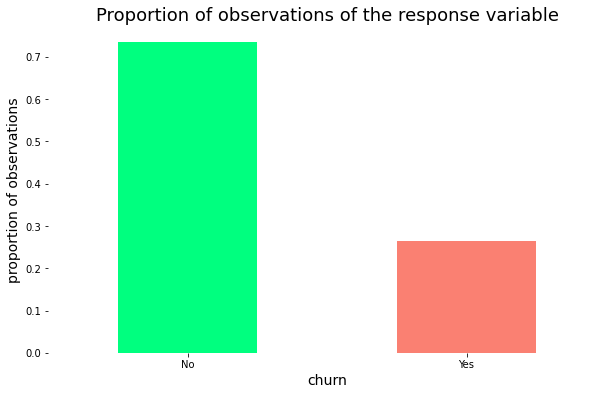

In [10]:
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

prop_response = data['Churn'].value_counts(normalize=True)

prop_response.plot(kind='bar', 
                   ax=ax,
                   color=['springgreen','salmon'])

ax.set_title('Proportion of observations of the response variable', fontsize=18)
ax.set_xlabel('churn', fontsize=14)
ax.set_ylabel('proportion of observations', fontsize=14)
ax.tick_params(rotation='auto')
spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)
    
plt.show()

The above bar plot shows the percentage of observations that correspond to each class of the response variable: no and yes. We can see that the data set is imbalanced because both classes are not equally distributed among all observations, being "no" the majority class (73.42%). When modeling, this imbalance will lead to a large number of false negatives.

In [11]:
import math

In [12]:
def percentage_stacked_plot(columns_to_plot, super_title):
    
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(data[column], data['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['springgreen','salmon'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

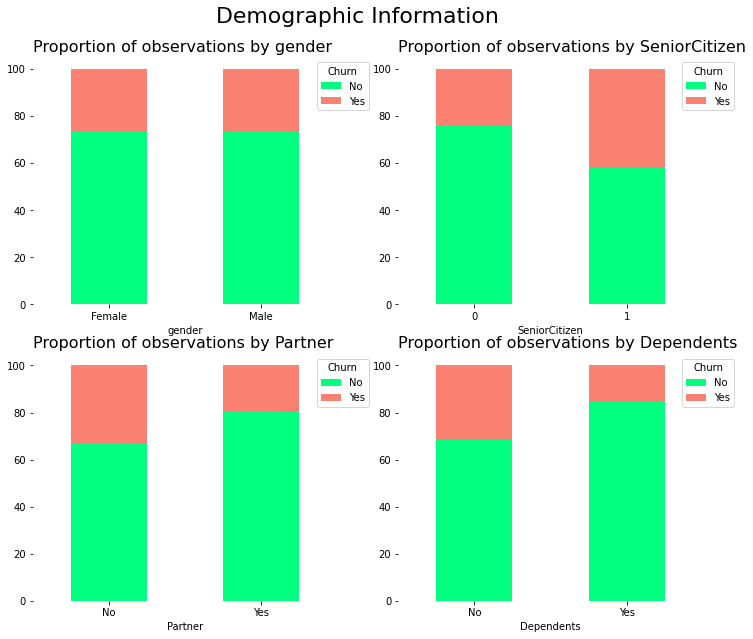

In [13]:
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

percentage_stacked_plot(demographic_columns, 'Demographic Information')

We can extract the following conclusions by analyzing demographic attributes:

    The churn rate of senior citizens is almost double that of young citizens.
    We do not expect gender to have significant predictive power. A similar percentage of churn is shown both when a customer is a man or a woman.
    Customers with a partner churn less than customers with no partner.

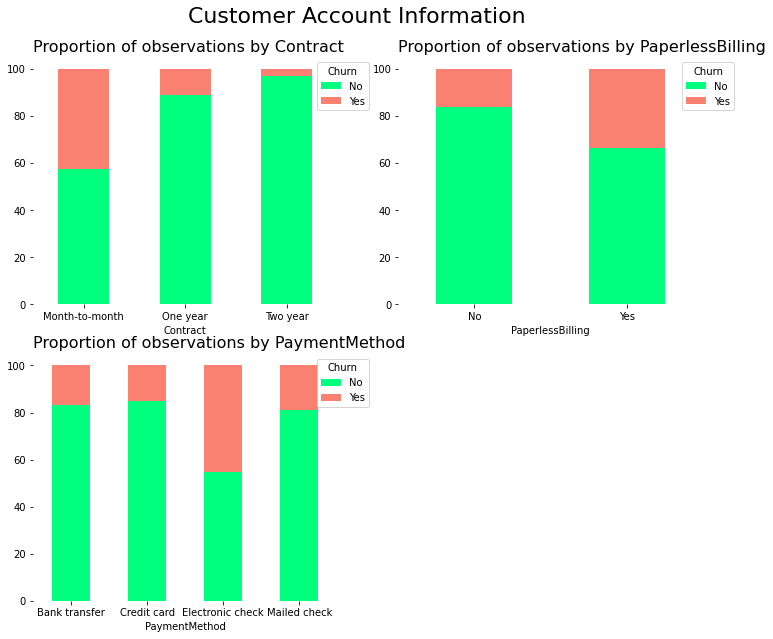

In [14]:
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']
percentage_stacked_plot(account_columns, 'Customer Account Information')

We can extract the following conclusions by analyzing customer account attributes:

    Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.
    Customers who opted for an electronic check as paying method are more likely to leave the company.
    Customers subscribed to paperless billing churn more than those who are not subscribed.

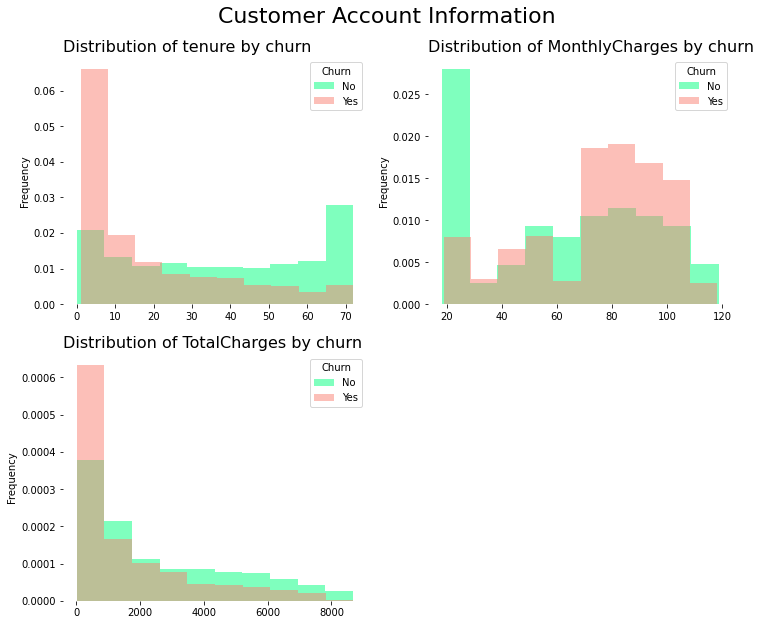

In [15]:
def histogram_plots(columns_to_plot, super_title):
    '''
    Prints a histogram for each independent variable of the list columns_to_plot.
        Parameters:
                columns_to_plot (list of string): Names of the variables to plot
                super_title (string): Super title of the visualization
        Returns:
                None
    '''  
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
    for index, column in enumerate(columns_to_plot, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        data[data['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True, 
                                                       alpha=0.5, color='springgreen', label='No')
        data[data['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                       alpha=0.5, color='salmon', label='Yes')
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')
        ax.tick_params(rotation='auto')
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
            
account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
histogram_plots(account_columns_numeric, 'Customer Account Information')

We can extract the following conclusions by analyzing the histograms above:

    The churn rate tends to be larger when monthly charges are high.
    New customers (low tenure) are more likely to churn.
    Clients with high total charges are less likely to leave the company.

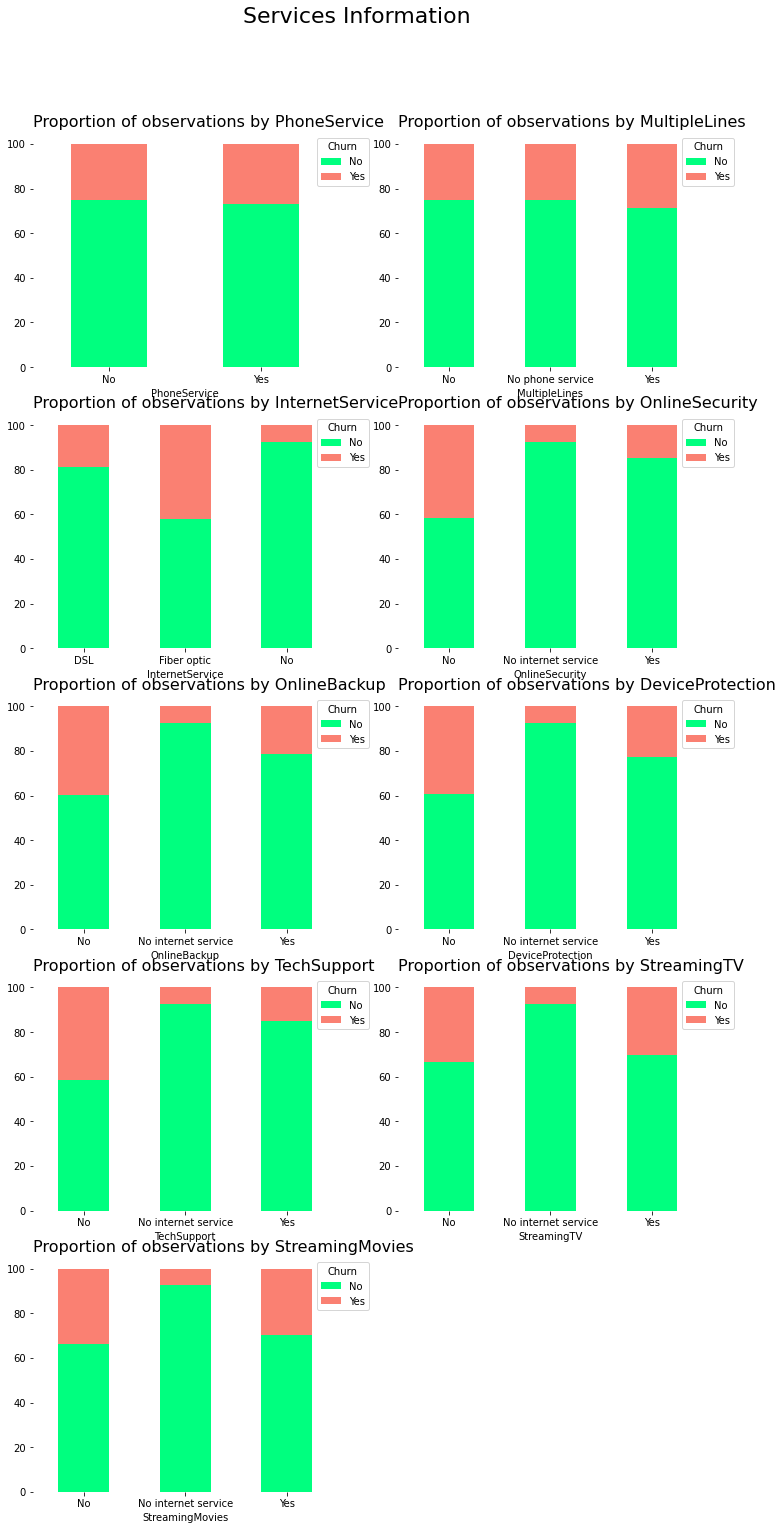

In [16]:
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

percentage_stacked_plot(services_columns, 'Services Information')

We can extract the following conclusions by evaluating services attributes:

    We do not expect phone attributes (PhoneService and MultipleLines) to have significant predictive power. The percentage of churn for all classes in both independent variables is nearly the same.
    Clients with online security churn less than those without it.
    Customers with no tech support tend to churn more often than those with tech support.

By looking at the plots above, we can identify the most relevant attributes for detecting churn. We expect these attributes to be discriminative in our future models.

# Feature Importance

In [17]:
from sklearn.metrics import mutual_info_score

Mutual information measures the mutual dependency between two variables based on entropy estimations. In machine learning, we are interested in evaluating the degree of dependency between each independent variable and the response variable. Higher values of mutual information show a higher degree of dependency which indicates that the independent variable will be useful for predicting the target.

Mutual information allows us not only to better understand our data but also to identify the predictor variables that are completely independent of the target.

In [18]:
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, data.Churn)
categorical_variables = data.select_dtypes(include=object).drop('Churn', axis=1)
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)
print(feature_importance)

Contract            0.098453
OnlineSecurity      0.064677
TechSupport         0.063021
InternetService     0.055574
OnlineBackup        0.046792
PaymentMethod       0.044519
DeviceProtection    0.043917
StreamingMovies     0.032001
StreamingTV         0.031908
PaperlessBilling    0.019194
Dependents          0.014467
Partner             0.011454
MultipleLines       0.000801
PhoneService        0.000072
gender              0.000037
dtype: float64


As shown above, gender, PhoneService, and MultipleLines have a mutual information score really close to 0, meaning those variables do not have a strong relationship with the target. This information is in line with the conclusions we have previously drawn by visualizing the data. In the following steps, we should consider removing those variables from the data set before training as they do not provide useful information for predicting the outcome.

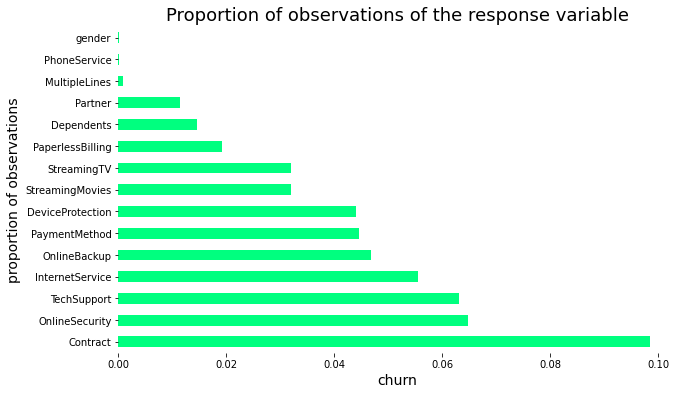

In [19]:
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

feature_importance.plot(kind = 'barh', ax = ax, color=['springgreen'])

ax.set_title('Proportion of observations of the response variable', fontsize=18)
ax.set_xlabel('churn', fontsize=14)
ax.set_ylabel('proportion of observations', fontsize=14)
ax.tick_params(rotation='auto')
spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)
    
plt.show()

The mutual information extends the notion of correlation to nonlinear relationships since, unlike Pearson’s correlation coefficient, this method is able to detect not only linear relationships but also nonlinear ones.

# Feature Engineering

In [20]:
data_transformed = data.copy()

label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']
for column in label_encoding_columns:
    if column == 'gender':
        data_transformed[column] = data_transformed[column].map({'Female': 1, 'Male': 0})
    else: 
        data_transformed[column] = data_transformed[column].map({'Yes': 1, 'No': 0}) 

In [21]:
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

data_transformed = pd.get_dummies(data_transformed, columns = one_hot_encoding_columns, drop_first = True)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [23]:
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
for column in min_max_columns:
        data_transformed[column] = pd.DataFrame(scaler.fit_transform(data_transformed[column].to_numpy().reshape(-1, 1)))
        
        
data_transformed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,1,0.115423,0.001275,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0.472222,1,0,0.385075,0.215867,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0.027778,1,1,0.354229,0.010310,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0.625000,0,0,0.239303,0.210241,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0.027778,1,1,0.521891,0.015330,1,...,0,0,0,0,0,0,0,0,1,0


In this classification problem, the rate of customers that did not churn (most frequent class) can be used as a baseline to evaluate the quality of the models generated. These models should outperform the baseline capabilities to be considered for future predictions.

In [24]:
for col in data_transformed.columns:
    if str(data_transformed[col].dtype) == 'uint8':
        data_transformed[col] = data_transformed[col].astype('int64')
    if data_transformed[col].dtype == np.float:
        data_transformed[col] = data_transformed[col].astype('float64')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [25]:
data_transformed.isna().sum()
data_transformed.dropna(axis = 0, inplace = True)

# Splitting Data set into testing and training data

In [26]:
X = data_transformed.drop(columns='Churn')
y = data_transformed.loc[:, 'Churn']
print(X.columns)
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
Churn


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40, shuffle=True, stratify = y)

# Setting Baseline

In machine learning, we often use a simple classifier called baseline to evaluate the performance of a model. In this classification problem, the rate of customers that did not churn (most frequent class) can be used as a baseline to evaluate the quality of the models generated. These models should outperform the baseline capabilities to be considered for future predictions.

# Comparing multiple algorithms

Algorithm selection is a key challenge in any machine learning project since there is not an algorithm that is the best across all projects. Generally, we need to evaluate a set of potential candidates and select for further evaluation those that provide better performance.

Comparing 6 different algorithms, all of them already implemented in Scikit-Learn.

    Dummy classifier (baseline)
    K Nearest Neighbours
    Logistic Regression
    Support Vector Machines
    Random Forest
    Gradiente Boosting

In [29]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [30]:
def create_models(seed=2):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines', SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    
    return models

# create a list with all the algorithms we are going to assess
models = create_models()

In [31]:
# test the accuracy of each model using default hyperparameters
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results.append(accuracy)
    names.append(name)
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: dummy_classifier, Accuracy: 0.7343572241183163)
Classifier: k_nearest_neighbors, Accuracy: 0.7656427758816837)
Classifier: logistic_regression, Accuracy: 0.8117178612059158)
Classifier: support_vector_machines, Accuracy: 0.7997724687144482)
Classifier: random_forest, Accuracy: 0.7912400455062572)


## Algorithm Selected: Logisitc Regression

# Hyperparameter Tuning

The selection of hyperparameters consists of testing the performance of the model against different combinations of hyperparameters, selecting those that perform best according to a chosen metric and a validation method.

For hyperparameter tuning, we need to split our training data again into a set for training and a set for testing the hyperparameters (often called validation set). It is a very common practice to use k-fold cross-validation for hyperparameter tuning. The training set is divided again into k equal-sized samples, 1 sample is used for testing and the remaining k-1 samples are used for training the model, repeating the process k times. Then, the k evaluation metrics (in this case the accuracy) are averaged to produce a single estimator.

The technique chosen for hyperparameter tuning is **GridSearchCV**

In [33]:
from sklearn.model_selection import GridSearchCV

parameters = {'penalty': ['l2', 'elasticnet'], 'C': [1.0, 0.9, 1.1, 0.95], 'random_state': [40], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
model = LogisticRegression()
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.9, 1.1, 0.95],
                         'penalty': ['l2', 'elasticnet'], 'random_state': [40],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [37]:
clf.best_params_, clf.best_score_, clf.n_splits_

({'C': 1.1, 'penalty': 'l2', 'random_state': 40, 'solver': 'newton-cg'},
 0.8018585033768897,
 5)

# Performance of the model

In [47]:
model = LogisticRegression(random_state = 40, C = 1.1, penalty = 'l2', solver = 'newton-cg')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy of the model: {np.round(accuracy*100, 2)}%')

accuracy of the model: 81.17%


As you can observe, hyperparameter tuning has barely increased the accuracy of the model.

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
print(f'confusion matrix:\n {confusion_matrix}\n\n classification report:\n {classification_report}')

confusion matrix:
 [[1156  135]
 [ 196  271]]

 classification report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.87      1291
           1       0.67      0.58      0.62       467

    accuracy                           0.81      1758
   macro avg       0.76      0.74      0.75      1758
weighted avg       0.81      0.81      0.81      1758



As shown above, 1427 observations of the testing data were correctly classified by the model (1156 true negatives and 271 true positives). On the contrary, we can observe 331 misclassifications (135 false positives and 196 false negatives).

As shown above, we obtain a sensitivity of 0.58 and a specificity of 0.90. The model obtained predicts more accurately customers that do not churn. This should not surprise us at all, since logistic regression classifiers are usually biased toward the classes with more observations.

# Conclusion

In this notebook, I have walked through a complete end-to-end machine learning project using the Telco customer Churn dataset. I started by cleaning the data and analyzing it with visualization. Then, to be able to build a machine learning model, I transformed the categorical data into numeric variables (feature engineering). After transforming the data, I tried 5 different machine learning algorithms using default parameters. Finally, we tuned the hyperparameters of the Logistic Regression Classifier (best performance model) for model optimization, obtaining an accuracy of nearly 81% (close to 8% higher than the baseline).